# Data processing workflow in DT-Engine project

## 1. Data loading

1. Data set (190124, 17) is used.
2. data\processed\b_with_fuels_separate_files\combined.parquet 
   -> current folder (notebooks\dt-engine\combined.parquet)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset from the parquet file
# Use a raw string or proper path separators if needed.
data_path = r"combined.parquet"
df = pd.read_parquet(data_path)

## 1. Data Inspection

In [ ]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

# View the first few rows to get a sense of the data
print(df.head())

# Get a concise summary of the dataframe including data types and non-null counts
df.info()

# Get basic statistical details (mean, std, quartiles) for numerical columns
print(df.describe())

# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

#### Data Cleaning:

Remove anomalous rows: - with negatives; with "0" and none.

In [6]:
import pandas as pd

# Load the dataset from the Parquet file
data_path = r"combined.parquet"
df = pd.read_parquet(data_path)

# Initial shape of the dataset
print("Original dataset shape:", df.shape)

# Convert the Time column to datetime if not already done (optional)
df['Time'] = pd.to_datetime(df['Time'])

# 1. Remove rows with missing values (None/NaN)
df_clean = df.dropna()
print("After dropping missing values:", df_clean.shape)

# 2. Identify numeric columns for anomaly checks
numeric_columns = df_clean.select_dtypes(include=['number']).columns

# 3. Remove rows with any negative or zero values in numeric columns
# Note: Adjust condition if zero is a valid value for some features.
df_clean = df_clean[(df_clean[numeric_columns] > 0).all(axis=1)]
print("After removing negatives and zeros:", df_clean.shape)

# Optionally, reset the index after cleaning
df_clean.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataset
print(df_clean.head())


Original dataset shape: (190124, 17)
After dropping missing values: (187536, 17)
After removing negatives and zeros: (110782, 17)
                     Time  Turbo Pressure  Coolant Temp    MAF     Power  \
0 1970-01-01 00:00:22.866          2192.0          64.9  173.9  0.099666   
1 1970-01-01 00:00:23.068          2265.0          64.9  170.5  0.099666   
2 1970-01-01 00:00:23.269          2256.0          64.9  173.7  0.099666   
3 1970-01-01 00:00:23.469          2283.0          64.9  174.5  0.099666   
4 1970-01-01 00:00:23.668          2137.0          65.0  171.9  0.099666   

     Torque   RPM  Oil Temp  Fuel Temp  Turbo Air Temp  Fuel Consump  \
0  0.498329  1200      79.0       44.3            46.0        0.3066   
1  0.498329  1200      79.0       44.3            46.0        0.3035   
2  0.498329  1201      79.0       44.3            46.0        0.3007   
3  0.498329  1201      80.0       44.4            46.0        0.2985   
4  0.498329  1201      80.0       44.4            46.

## 2. Exploratory Data Analysis (EDA)
### a. Feature Distributions

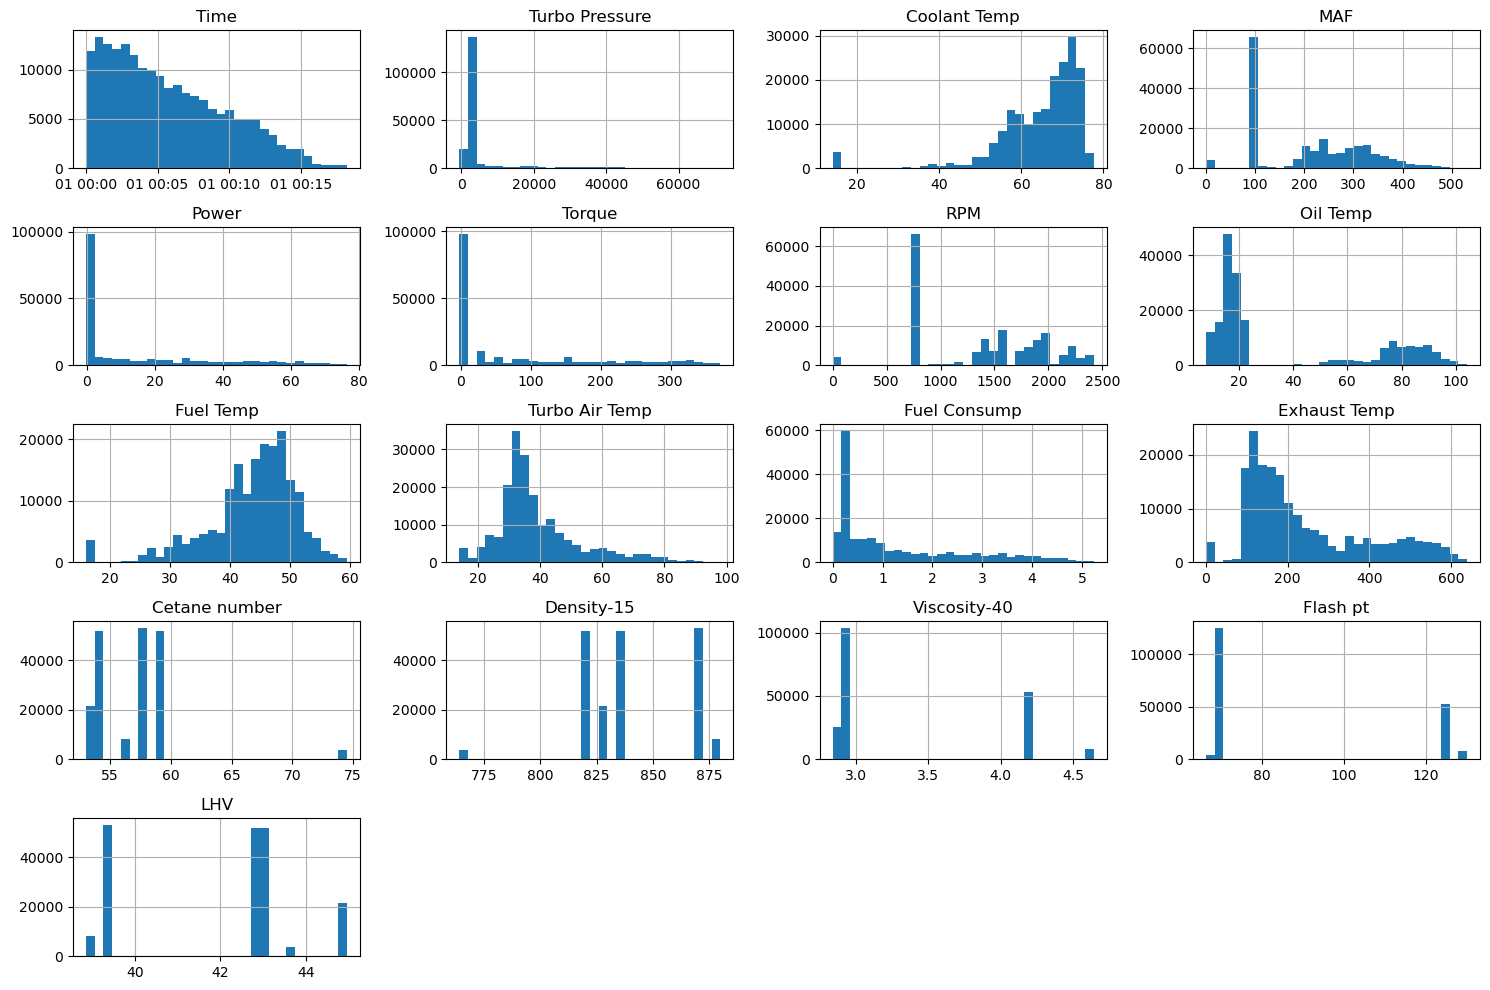

In [7]:
# Plot histograms for each numerical feature to see their distributions
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()  # Adjust subplot params for a neat layout
plt.show()

### b. Correlations between features
Compute the correlation matrix and visualize it using a heatmap

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### c. Detecting Potential Outliers
Create boxplots for each feature to visually identify outliers

In [ ]:
plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title("Boxplots for Each Feature")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Drop the 'Turbo Pressure' column from the DataFrame for plotting
df_excluding_turbo = df.drop(columns=['Turbo Pressure'])

plt.figure(figsize=(15, 10))
df_excluding_turbo.boxplot(rot=90)
plt.title("Boxplots for Each Feature (Excluding Turbo Pressure)")
plt.tight_layout()
plt.show()